In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from timeit import default_timer as timer

## Strain A - NOR Gate

In [717]:
def dydt(t,y, kp, kd, kpt, klx, kdt, kpg, kt, kdg, a, b): #parameters

    l, x, tet, g = y #variables

    dl_dt = kp*a - kd*l
    dx_dt = kp*b - kd*x
    
    if a == 0 and b == 0:
        dtet_dt = 0
    else:
        dtet_dt = kpt*((l+x)**2/(klx**2+(l+x)**2))-(kdt*tet)#need to check typical values for activation/repression constants
    
    dGFP_dt = kpg*((1/(1 + (tet/kt)**2)))-(kdg*g)

    # dl_dt=max(dl_dt,0)
    # dx_dt=max(dl_dt,0)
    # dtet_dt=max(dl_dt,0)
    # dGFP_dt=max(dl_dt,0)
    
    return dl_dt, dx_dt, dtet_dt, dGFP_dt

kp, kd, kpt, klx, kdt, kpg, kt, kdg, a, b =  1, 0.4, 1, 2, 0.2, 0.7, 0.5, 0.5, 1,0#need production tet to be higher than g

l0, x0, tet0, g0 = 0,0,0,5

dGdt_withks = lambda t,y: dydt(t,y,kp, kd, kpt, klx, kdt, kpg, kt, kdg, a, b)

In [719]:
start = timer()
solution = scipy.integrate.solve_ivp(dGdt_withks, t_span=(0,40), y0=(l0, x0, tet0, g0), method='RK45', rtol=1e-6)
end = timer()
time_for_num_int_by_ode45 = end-start
print("time for ODE45, ",   time_for_num_int_by_ode45)

t_ode45 = solution.t
l_ode45 = solution.y[0]
x_ode45 = solution.y[1]
tet_ode45 = solution.y[2]
gfp_ode45 = solution.y[3]

time for ODE45,  0.008590900000854162


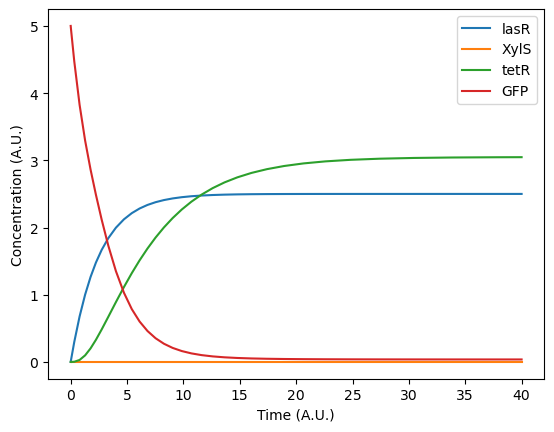

In [721]:
plt.plot(t_ode45, l_ode45, label = 'lasR')
plt.plot(t_ode45, x_ode45, label = 'XylS')
plt.plot(t_ode45, tet_ode45, label = 'tetR')
plt.plot(t_ode45, gfp_ode45, label = 'GFP')
plt.xlabel("Time (A.U.)")
plt.ylabel("Concentration (A.U.)")
plt.legend()

## Strain B - NAND Gate

In [723]:
def dydt(t,y, kp, kd, ks, kls, kds, kpt, kdt, kpg, kt, kdg, a, b): #parameters

    l, x, s, tet, g = y #variables

    dl_dt = kp*a - kd*l
    dx_dt = kp*b - kd*x
    
    if a == 0 and b == 0:
        ds_dt = 0
    else:
        ds_dt = ks*((l*x)**2/(kls**2+(l*x)**2))-(kds*s)#need to check typical values for activation/repression constants

    dtet_dt = (kpt*s)-(kdt*tet)
    
    dGFP_dt = kpg*((1/(1 + (tet/kt)**2)))-(kdg*g)

    # dl_dt=max(dl_dt,0)
    # dx_dt=max(dl_dt,0)
    # dtet_dt=max(dl_dt,0)
    # dGFP_dt=max(dl_dt,0)
    
    return dl_dt, dx_dt, ds_dt, dtet_dt, dGFP_dt

kp = 0.7
kd = 0.4
ks = 0.6
kls = 1
kpt = 0.5
kds = 0.5
kdt = 0.2
kpg = 0.7
kt = 0.7
kdg = 0.5
a = 1
b = 1

l0, x0, s0, tet0, g0 = 0,0,0,0,5

dGdt_withks = lambda t,y: dydt(t,y, kp, kd, ks, kls, kds, kpt, kdt, kpg, kt, kdg, a, b)

In [725]:
start = timer()
solution = scipy.integrate.solve_ivp(dGdt_withks, t_span=(0,50), y0=(l0, x0, s0, tet0, g0), method='LSODA', rtol=1e-6)
end = timer()
time_for_num_int_by_ode45 = end-start
print("time for ODE45, ",   time_for_num_int_by_ode45)

t_ode45 = solution.t
l_ode45 = solution.y[0]
x_ode45 = solution.y[1]
s_ode45 = solution.y[2]
tet_ode45 = solution.y[3]
gfp_ode45 = solution.y[4]

time for ODE45,  0.004025799997180002


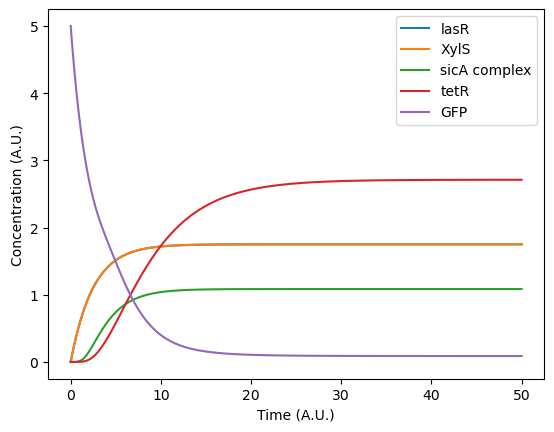

In [727]:
plt.plot(t_ode45, l_ode45, label = 'lasR')
plt.plot(t_ode45, x_ode45, label = 'XylS')
plt.plot(t_ode45, s_ode45, label = 'sicA complex')
plt.plot(t_ode45, tet_ode45, label = 'tetR')
plt.plot(t_ode45, gfp_ode45, label = 'GFP')
plt.xlabel("Time (A.U.)")
plt.ylabel("Concentration (A.U.)")
plt.legend()